#### *Please refer to the accompanying report*

## Mini Project Two

**File:** nsa325_mp2.ipnyb<br>
**Name:** Nishant Aswani<br>
**Professor:** Hwasoo Yeo<br>
**Assignment:** Mini Project 2<br>
**Course:** Machine Learning (ENGR-UH 4560) Fall 2019<br>
**Due:** Oct 24 2019<br>

### About the Dataset

*These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.*

*All attributes are continuous*

*No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)*

Source: https://archive.ics.uci.edu/ml/datasets/wine

In [1]:
import numpy as np
import pandas as pd

# To import wine data
from sklearn.datasets import load_wine

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC

# To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
# Load the wine dataset 
data = load_wine()

# Preview of Data
# commented lines show that we are potentially focusing on the data and target fields for our project

# print(data)
# print(data['DESCR'])

# for key,value in data.items():
#     print(key,'\n',value,'\n'


# Check for data shape
print('data.shape\t',data['data'].shape,
      '\ntarget.shape \t',data['target'].shape)

# Move data into pandas dataframe and view
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['target'] = data['target']
df.head()

data.shape	 (178, 13) 
target.shape 	 (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# View basic statistics
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Data Visualization

We carry out some histogram plotting to view the spread of the each feature across our tagged wine types.

From the graphs below, we see that wine types have noticeably different means in the following features: 
* alcohol
* flavanoids
* total_phenols

Text(0.5, 0.98, 'Histograms of Wine Attributes Amongst Classified Types')

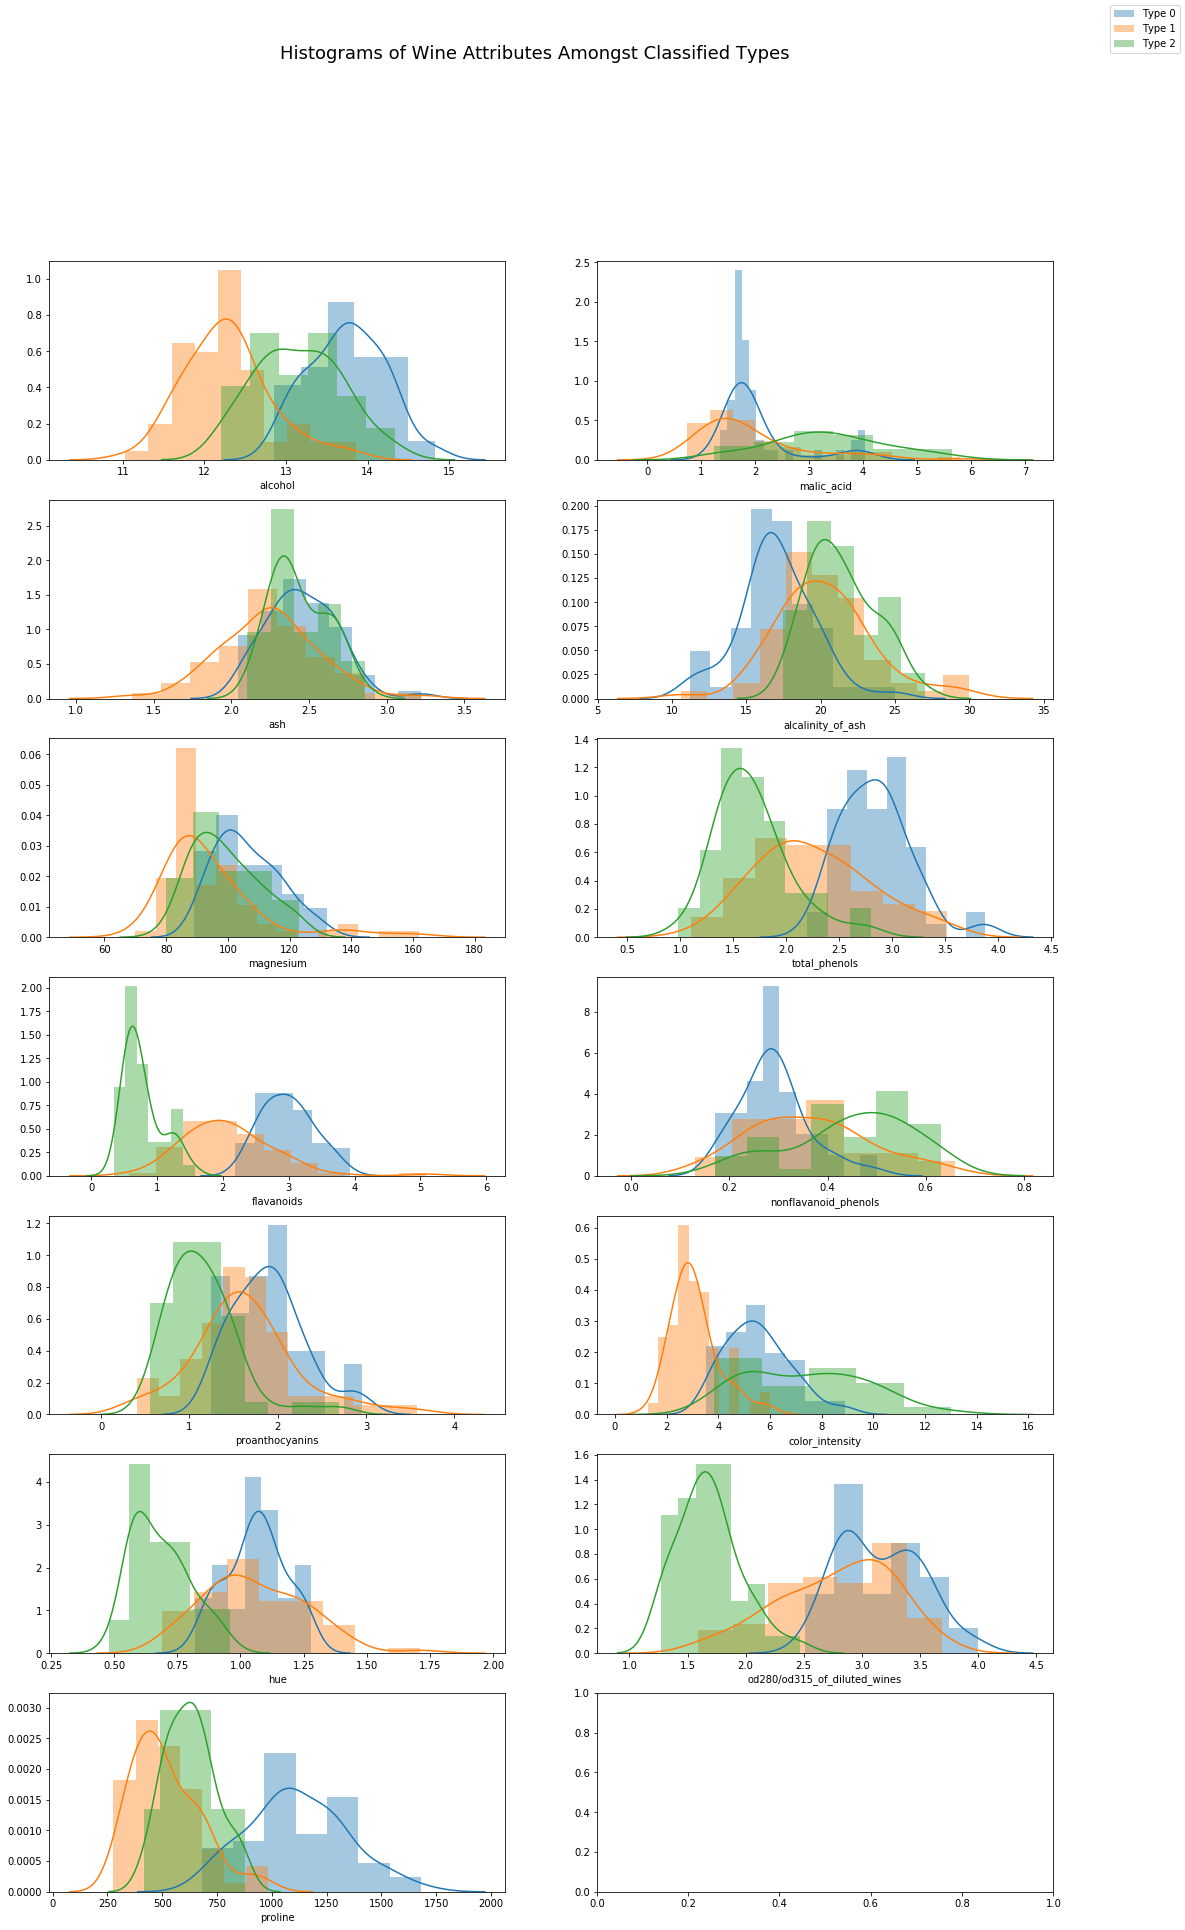

In [38]:
# View data distribution among wine types

fig, axes = plt.subplots(7, 2, figsize=(18, 30))
axes = axes.flatten()

features = df.columns
features = features.drop(['target'])

for i, col in enumerate(features):
    for j in df.target.unique():
        sns.distplot(df[col][df.target==j],kde=True,ax=axes[i])
        
fig.legend(['Type 0', 'Type 1', 'Type 2'],fontsize=10)
fig.suptitle("Histograms of Wine Attributes Amongst Classified Types", fontsize=18)

## Data Checking

The following confirms that there is no missing data and shows the kernel density plots prior to scaling. 

In [11]:
# Check for missing data
missingData = np.where(np.isnan(df))[0]

if(missingData.size > 0):
    print("Needs cleaning!")
    
else:
    print("No missing data!\n")

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], train_size=0.70, random_state=69)

print(len(X_train), "samples in training")
print(len(X_test), "samples in testing")

# Set features to column names
features = df.columns
features = features.drop(['target'])

# Convert into dataframe
df_X_train = pd.DataFrame(X_train, columns=features)


No missing data!

124 samples in training
54 samples in testing


## Standard Support Vector Machine

We use the prepackaged standard vector machine (SVM) to obtain the baseline performance. We use the rbf kernel for the SVC model and obtain horrendous results, 


In [6]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)


print ("Confusion Matrix ")
print('\n')


print ("               Predicted")
print ("         |  0  |  1  |  2  |")
print ("         |-----|-----|-----|")
print ("       0 | %3d | %3d | %3d |" % (confusion_matrix[0, 0],
                                         confusion_matrix[0, 1], 
                                         confusion_matrix[0, 2]))
print ("         |-----|-----|-----|")
print ("Actual 1 | %3d | %3d | %3d |" % (confusion_matrix[1, 0],
                                         confusion_matrix[1, 1],
                                         confusion_matrix[1, 2]))

print ("         |-----|-----|-----|")
print ("       2 | %3d | %3d | %3d |" % (confusion_matrix[2, 0],
                                         confusion_matrix[2, 1],
                                         confusion_matrix[2, 2]))
print ("         |-----|-----|-----|")

print('\n\n')

print(metrics.classification_report(y_test,y_pred))

Confusion Matrix 


               Predicted
         |  0  |  1  |  2  |
         |-----|-----|-----|
       0 |   3 |  14 |   0 |
         |-----|-----|-----|
Actual 1 |   0 |  23 |   0 |
         |-----|-----|-----|
       2 |   0 |  13 |   1 |
         |-----|-----|-----|



              precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.46      1.00      0.63        23
           2       1.00      0.07      0.13        14

    accuracy                           0.50        54
   macro avg       0.82      0.42      0.35        54
weighted avg       0.77      0.50      0.40        54



## Data Preprocessing

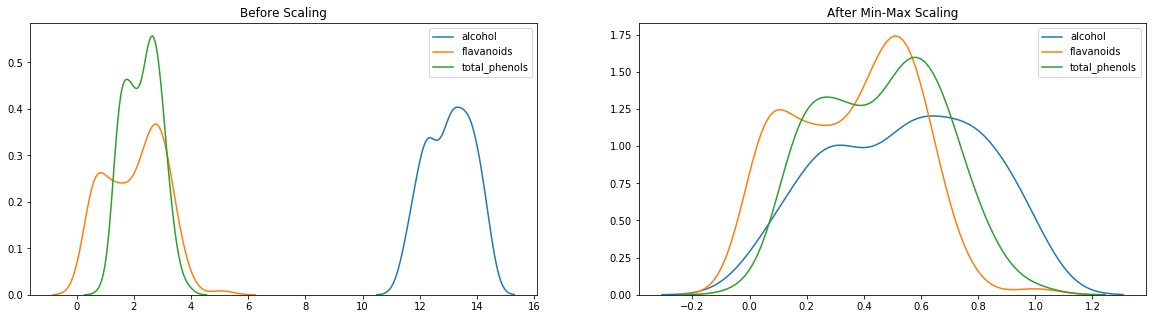

In [20]:
# Use sklearn's preprocessing library to standardize data
scalerX = preprocessing.MinMaxScaler()
X_train_minmax = scalerX.fit_transform(X_train)

df_X_train_minmax = pd.DataFrame(X_train_minmax, columns=features)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

# Plot data prior to scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df_X_train['alcohol'], ax=ax1)
sns.kdeplot(df_X_train['flavanoids'],ax=ax1)
sns.kdeplot(df_X_train['total_phenols'],ax=ax1)

# Plot data after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_X_train_minmax['alcohol'], ax=ax2)
sns.kdeplot(df_X_train_minmax['flavanoids'],ax=ax2)
sns.kdeplot(df_X_train_minmax['total_phenols'],ax=ax2)

## Modified Support Vector Machine (SVM)

In this new model, we aim to change the carry out some preprocessing, update the kernel function, and tune the hyperparameters.


In [40]:
polynomial_svm_clf = Pipeline([
                               ("scaler", preprocessing.MinMaxScaler()), 
                               ("svm_clf", SVC(kernel='linear', gamma='auto'))
                              ])

polynomial_svm_clf.fit(X_train, y_train)
y_pred = polynomial_svm_clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)


print ("Confusion Matrix ")
print('\n')


print ("               Predicted")
print ("         |  0  |  1  |  2  |")
print ("         |-----|-----|-----|")
print ("       0 | %3d | %3d | %3d |" % (confusion_matrix[0, 0],
                                         confusion_matrix[0, 1], 
                                         confusion_matrix[0, 2]))
print ("         |-----|-----|-----|")
print ("Actual 1 | %3d | %3d | %3d |" % (confusion_matrix[1, 0],
                                         confusion_matrix[1, 1],
                                         confusion_matrix[1, 2]))

print ("         |-----|-----|-----|")
print ("       2 | %3d | %3d | %3d |" % (confusion_matrix[2, 0],
                                         confusion_matrix[2, 1],
                                         confusion_matrix[2, 2]))
print ("         |-----|-----|-----|")

print('\n\n')

print(metrics.classification_report(y_test,y_pred))

Confusion Matrix 


               Predicted
         |  0  |  1  |  2  |
         |-----|-----|-----|
       0 |  17 |   0 |   0 |
         |-----|-----|-----|
Actual 1 |   0 |  23 |   0 |
         |-----|-----|-----|
       2 |   0 |   0 |  14 |
         |-----|-----|-----|



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

1.0


## Testing the Modified SVM With Multiple Splits


In [55]:
polynomial_svm_clf = Pipeline([
                               ("scaler", preprocessing.MinMaxScaler()), 
                               ("svm_clf", SVC(kernel='linear', gamma='auto'))
                              ])

runs = 500
accuracy = np.zeros(runs)

for i in range(runs):
    X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], train_size=0.70, random_state=i)
    polynomial_svm_clf.fit(X_train, y_train)
    y_pred = polynomial_svm_clf.predict(X_test)
    accuracy[i] = metrics.accuracy_score(y_test, y_pred)

print("Mean after %d Splits: %.4f\n" % (runs, np.mean(accuracy)))
print("Variance after %d Splits: %.4f" % (runs, np.var(accuracy)))


Mean after 500 Splits: 0.9789

Variance after 500 Splits: 0.0004
